In [20]:
import pandas as pd
import numpy as np
playstore = pd.read_csv('csvgoogleplaystore.csv')
df = pd.DataFrame(playstore)
df.columns = ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']

In [23]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [24]:
playstore.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


<AxesSubplot:ylabel='Content Rating'>

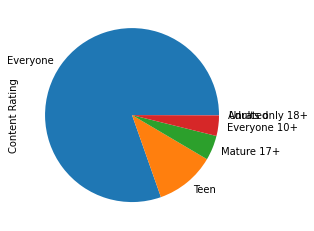

In [26]:
df['Content Rating'].value_counts().plot(kind = 'pie')

In [27]:
import matplotlib.pyplot as plt

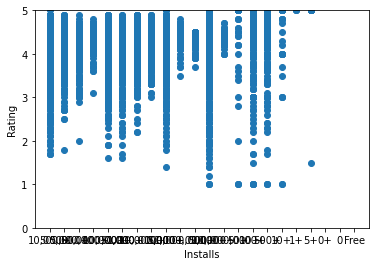

In [28]:
ax = plt.scatter(x = df['Installs'], y = df['Rating'])
ax = plt.xlabel('Installs')
ax = plt.ylabel('Rating')
plt.ylim(0,5)
plt.show()

In [29]:
df['Reviews'] = df['Reviews'].replace('[M.]', '', regex=True).astype(int)

In [30]:
df['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [31]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [32]:
import seaborn as sns

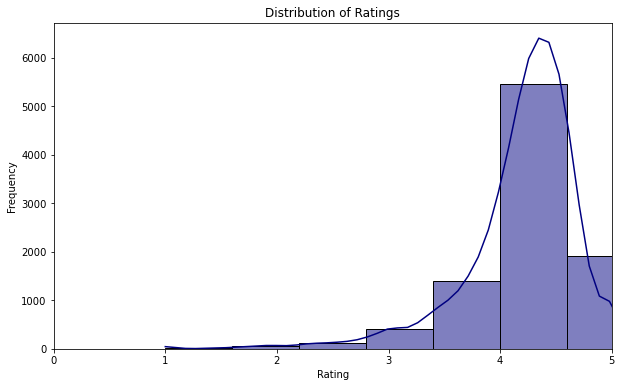

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True, color='navy')
#bins - width of the bar, kde - Kernel Density Estimate plot
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xlim(0,5)
plt.show()

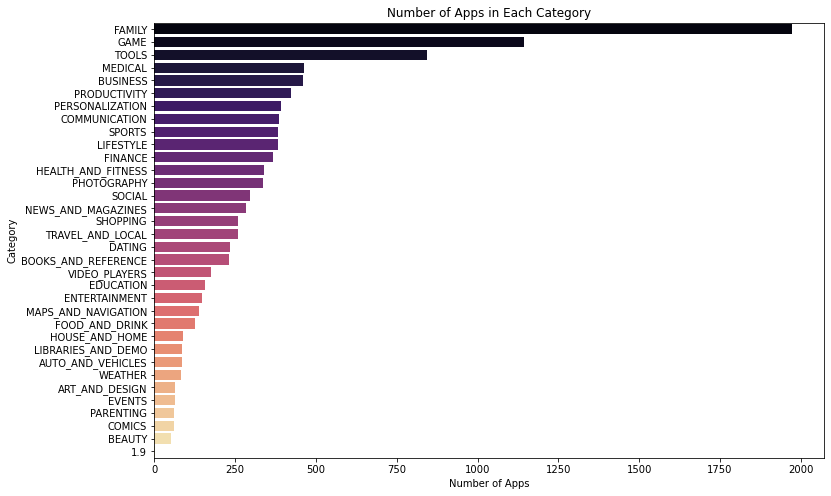

In [34]:
plt.figure(figsize=(12,8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index, palette = 'magma')
plt.title('Number of Apps in Each Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()

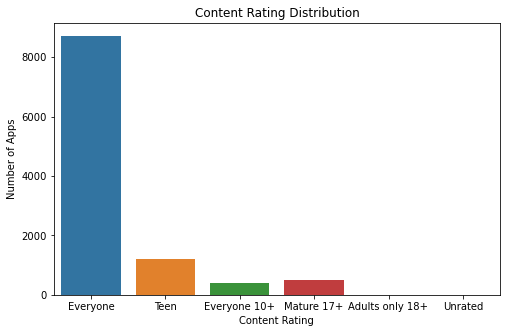

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Content Rating', data=df)
plt.title('Content Rating Distribution')
plt.xlabel('Content Rating')
plt.ylabel('Number of Apps')
plt.show()

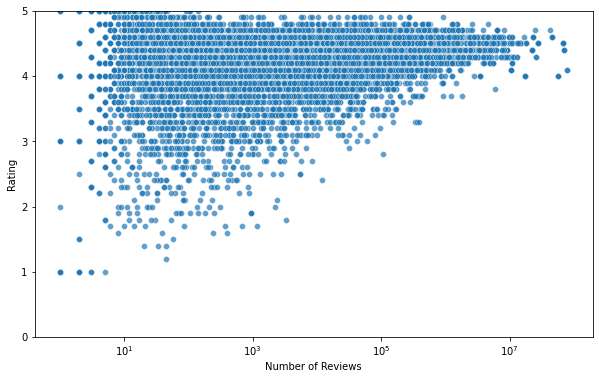

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df, alpha=0.7)
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.xscale('log')
plt.ylim(0,5)
plt.show()

In [38]:
#null data
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [39]:
correlation_matrix = df.corr()

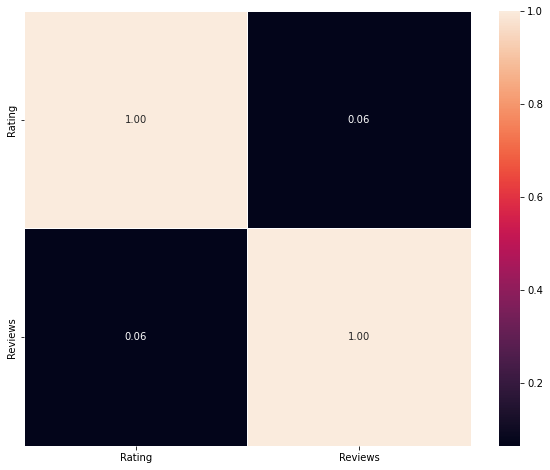

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.show()

In [41]:
f_dict={}
lst = ['Type','Content Rating', 'Price', 'Size', 'Reviews','Installs']
for f in lst:
    for i in range(len(list(df[f].unique()))):
        f_dict[list(list(df[f].unique()))[i]]= i
    df[f]= df[f].map(f_dict)

In [71]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [73]:
category_dict = {}
for i in range(len(list(df['Category'].unique()))):
    category_dict[list(df['Category'].unique())[i]] = i
category_dict

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FINANCE': 11,
 'FOOD_AND_DRINK': 12,
 'HEALTH_AND_FITNESS': 13,
 'HOUSE_AND_HOME': 14,
 'LIBRARIES_AND_DEMO': 15,
 'LIFESTYLE': 16,
 'GAME': 17,
 'FAMILY': 18,
 'MEDICAL': 19,
 'SOCIAL': 20,
 'SHOPPING': 21,
 'PHOTOGRAPHY': 22,
 'SPORTS': 23,
 'TRAVEL_AND_LOCAL': 24,
 'TOOLS': 25,
 'PERSONALIZATION': 26,
 'PRODUCTIVITY': 27,
 'PARENTING': 28,
 'WEATHER': 29,
 'VIDEO_PLAYERS': 30,
 'NEWS_AND_MAGAZINES': 31,
 'MAPS_AND_NAVIGATION': 32,
 '1.9': 33}

In [83]:
df['category_converted'] = df['Category'].map(category_dict)

In [92]:
df['category_converted'] = df['category_converted'].values.astype(np.int64)

In [74]:
genre_dict={}
for i in range(len(list(df['Genres'].unique()))):
    genre_dict[list(df['Genres'].unique())[i]] = i
genre_dict

{'Art & Design': 0,
 'Art & Design;Pretend Play': 1,
 'Art & Design;Creativity': 2,
 'Art & Design;Action & Adventure': 3,
 'Auto & Vehicles': 4,
 'Beauty': 5,
 'Books & Reference': 6,
 'Business': 7,
 'Comics': 8,
 'Comics;Creativity': 9,
 'Communication': 10,
 'Dating': 11,
 'Education;Education': 12,
 'Education': 13,
 'Education;Creativity': 14,
 'Education;Music & Video': 15,
 'Education;Action & Adventure': 16,
 'Education;Pretend Play': 17,
 'Education;Brain Games': 18,
 'Entertainment': 19,
 'Entertainment;Music & Video': 20,
 'Entertainment;Brain Games': 21,
 'Entertainment;Creativity': 22,
 'Events': 23,
 'Finance': 24,
 'Food & Drink': 25,
 'Health & Fitness': 26,
 'House & Home': 27,
 'Libraries & Demo': 28,
 'Lifestyle': 29,
 'Lifestyle;Pretend Play': 30,
 'Adventure;Action & Adventure': 31,
 'Arcade': 32,
 'Casual': 33,
 'Card': 34,
 'Casual;Pretend Play': 35,
 'Action': 36,
 'Strategy': 37,
 'Puzzle': 38,
 'Sports': 39,
 'Music': 40,
 'Word': 41,
 'Racing': 42,
 'Casual;

In [88]:
df['genre_converted'] = df['Genres'].map(genre_dict)

In [93]:
df['genre_converted'] = df['genre_converted'].values.astype(np.int64)

In [96]:
for i in df.index:
    if type(df.loc[i, 'Android Ver']) == str and  'Varies' in df.loc[i, 'Android Ver']:
        df.loc[i, 'Android Ver'] = -1
    elif type(df.loc[i, 'Android Ver']) == str and df.loc[i, 'Android Ver'][0].isdigit():
        df.loc[i, 'Android Ver'] = float(df.loc[i, 'Android Ver'][:3])

In [103]:
df['Android Ver'] = df['Android Ver'].values.astype(np.float64)

In [75]:
type_dict={}
for i in range(len(list(df['Type'].unique()))):
    type_dict[list(df['Type'].unique())[i]] = i
type_dict

{0: 0, 1: 1, 2: 2, 3: 3}

In [44]:
for i in df.index:
    if type(df.loc[i,'Size'])==str and 'M' in df.loc[i,'Size']:
        df.loc[i,'Size'] = float(df.loc[i,'Size'][:-1])
    elif type(df.loc[i,'Size']) == str and 'Vareis' in df.loc[i,'Size']:
        df.loc[i,'Size'] = -1
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,0,0,0,0,0,0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,1,1,1,0,0,0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,2,2,2,0,0,0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,3,3,3,0,0,1,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,1,4,4,0,0,0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,119,118,8,0,0,0,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,425,42,14,0,0,0,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,532,75,11,0,0,0,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,179,29,11,0,0,3,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [45]:
df['Installs'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [46]:
for i in df.index:
    if type(df.loc[i,'Installs'])==str and '+' in df.loc[i,'Installs']:
        df.loc[i,'Installs'] = float("".join(df.loc[i,'Installs'][:-1].split(",")))
    elif type(df.loc[i,'Installs']) == str and 'Free' in df.loc[i,'Installs']:
        df.loc[i,'Installs'] = -1
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,0,0,0,0,0,0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,1,1,1,0,0,0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,2,2,2,0,0,0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,3,3,3,0,0,1,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,1,4,4,0,0,0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,119,118,8,0,0,0,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,425,42,14,0,0,0,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,532,75,11,0,0,0,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,179,29,11,0,0,3,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [47]:
df['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [48]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [49]:
df['Current Ver'] = df['Current Ver'].apply(lambda x: '.'.join(str(x).split('.')[:2]) if '.' in str(x) else str(x))
df['Android Ver'] = df['Android Ver'].apply(lambda x: '.'.join(str(x).split('.')[:2]) if '.' in str(x) else str(x))
print(df[['Current Ver', 'Android Ver']].head())

          Current Ver Android Ver
0                 1.0         4.0
1                 2.0         4.0
2                 1.2         4.0
3  Varies with device  4.2 and up
4                 1.1  4.4 and up


In [51]:
df = df.drop("Last Updated", axis='columns')

In [53]:
ver_dict={}
for i in range(len(list(df['Android Ver'].unique()))):
    ver_dict[list(df['Android Ver'].unique())[i]] = i
ver_dict

{'4.0': 0,
 '4.2 and up': 1,
 '4.4 and up': 2,
 '2.3 and up': 3,
 '3.0 and up': 4,
 '4.1 and up': 5,
 '4.0 and up': 6,
 '2.3': 7,
 'Varies with device': 8,
 '2.2 and up': 9,
 '5.0 and up': 10,
 '6.0 and up': 11,
 '1.6 and up': 12,
 '1.5 and up': 13,
 '2.1 and up': 14,
 '7.0 and up': 15,
 '5.1 and up': 16,
 '4.3 and up': 17,
 '2.0 and up': 18,
 '3.2 and up': 19,
 '4.4W and up': 20,
 '7.1 and up': 21,
 '7.0 - 7': 22,
 '8.0 and up': 23,
 '5.0 - 8': 24,
 '3.1 and up': 25,
 '2.0': 26,
 '4.1 - 7': 27,
 'nan': 28,
 '5.0 - 6': 29,
 '1.0 and up': 30,
 '2.2 - 7': 31,
 '5.0 - 7': 32}

In [80]:
df['Rating'] = df['Rating'].values.astype(np.int64)
print(df['Rating'])

0                          4
1                          3
2                          4
3                          4
4                          4
                ...         
10836                      4
10837                      5
10838   -9223372036854775808
10839                      4
10840                      4
Name: Rating, Length: 10841, dtype: int64


In [81]:
df.dtypes

App               object
Category          object
Rating             int64
Reviews            int64
Size               int64
Installs           int64
Type               int64
Price              int64
Content Rating     int64
Genres            object
Current Ver       object
Android Ver       object
dtype: object

In [62]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'],
      dtype='object')

In [109]:
#elbow method to check k
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X = df[['category_converted', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'genre_converted', 'Android Ver']] 
y = df[['Rating']]
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [111]:
test_score = []
train_score = []
for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    test_score.append(knn.score(X_test,y_test))
    train_score.append(knn.score(X_train,y_train))

/Users/gabiella/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/gabiella/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/gabiella/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/gabiella/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1

KeyboardInterrupt: 

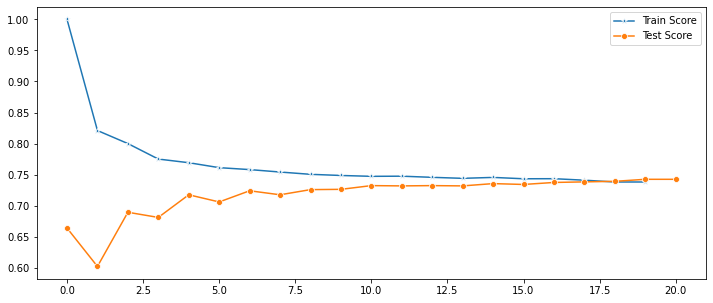

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.lineplot(data=train_score,marker='*',label='Train Score')
p = sns.lineplot(data=test_score,marker='o',label='Test Score')

In [114]:
knn =KNeighborsClassifier(n_neighbors = 16)#k == 16
knn.fit(X_train, y_train)
accuracy_train = knn.score(X_train, y_train)
accuracy_test = knn.score(X_test, y_test)
print(f"Score on training set:{accuracy_train}")
print(f"Score on test set:{accuracy_test}")

/Users/gabiella/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Score on training set:0.7434832756632065
Score on test set:0.7343173431734318


In [101]:
df.isna().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Current Ver           0
Android Ver           0
category_converted    0
genre_converted       0
dtype: int64

In [106]:
df = df.dropna()

In [107]:
df.isnull().sum()

App                   0
Category              0
Rating                0
Reviews               0
Size                  0
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Current Ver           0
Android Ver           0
category_converted    0
genre_converted       0
dtype: int64

In [118]:
test = df[['category_converted', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'genre_converted', 'Android Ver']].iloc[-1:]
x_val = df[['category_converted', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'genre_converted', 'Android Ver']].iloc[:-1]
y_val = df['Rating'].iloc[:-1]

In [119]:
df.iloc[1,:]

App                         Coloring book moana
Category                         ART_AND_DESIGN
Rating                                        3
Reviews                                       1
Size                                          1
Installs                                      1
Type                                          0
Price                                         0
Content Rating                                0
Genres                Art & Design;Pretend Play
Current Ver                                 2.0
Android Ver                                 4.0
category_converted                            0
genre_converted                             1.0
Name: 1, dtype: object

In [120]:
n_knn = knn.fit(x_val, y_val)
distances, indices = n_knn.kneighbors(test)
final_table = pd.DataFrame(n_knn.kneighbors(test)[0][0], columns = ['distance'])
final_table['index'] = n_knn.kneighbors(test)[1][0]
final_table.set_index('index')
result = final_table.join(df, on = 'index')
result[['distance', 'index', 'App', 'Rating']]

,distance,index,App,Rating
0,22.022716,10811,FR Plus 1.6,-9223372036854775808
1,29.462009,10787,Modern Counter Global Strike 3D,4
2,30.463257,10806,SnakeBite911 FR,-9223372036854775808
3,39.255700,10736,FP-safe,-9223372036854775808
4,47.697065,10681,Future Cloud,4
5,50.145887,10680,Fresh News,4
6,53.740115,10789,Modern Counter Global Strike 3D V2,4
7,56.508760,10788,Fountain Live Wallpaper HD – Dubai Wallpaper 3D,-9223372036854775808
8,57.416113,10633,Florida Offline Road Map,3
9,58.326666,10676,Calculator Fn,-9223372036854775808
